1.	Создайте две серии данных Pandas. В первой будут храниться значения в диапазоне [1; 100], а во второй случайные целочисленные значения (равномерное распределение) из диапазона [0,10]. Объедините их в DataFrame.

In [137]:
import pandas as pd
import numpy as np

first = pd.Series(range(100))
second = pd.Series(np.random.randint(0,11,100))
data = {'range':first, 'normal':second}

df = pd.DataFrame(data)
df.index.name = 'idx'
df

,range,normal
idx,,
0,0,0
1,1,0
2,2,8
3,3,1
4,4,9
...,...,...
95,95,1
96,96,2
97,97,6


2.	Выведите описательную статистику по имеющимся сериям, где в качестве строк выступают названия столбцов

In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
range,100.0,49.50,29.011492,0.0,24.75,49.5,74.25,99.0
normal,100.0,4.54,3.173183,0.0,2.00,5.0,7.00,10.0


3.	Из обеих колонок отнимите среднее значение и поделите на стандартное отклонение (нормализуйте данные). Повторите вывод описательной статистики. 

In [139]:
df1 = df.copy()
df1.range = (df1.range  - df1.range.mean())/df1.range.std()
df1.normal = (df1.normal  - df1.normal.mean())/df1.normal.std()
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
range,100.0,4.440892e-17,1.0,-1.70622,-0.853110,0.000000,0.853110,1.70622
normal,100.0,-1.110223e-17,1.0,-1.43074,-0.800458,0.144965,0.775247,1.72067


4.	Сделайте масштабирование в каждом столбце в диапазоне от 0 до 1 и выведите описательную статистику, не меняя исходных данных.

In [140]:
df2 = df.copy()
df2.range = (df2.range  - df2.range.min())/(df2.range.max()  - df2.range.min())
df2.normal = (df2.normal  - df2.normal.min())/(df2.normal.max()  - df2.normal.min())
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
range,100.0,0.500,0.293045,0.0,0.25,0.5,0.75,1.0
normal,100.0,0.454,0.317318,0.0,0.20,0.5,0.70,1.0


5.	Добавьте столбец s3, вычисляемый как произведение столбцов s1 и s2. 

In [141]:
df['multiply'] = first * second
df

,range,normal,multiply
idx,,,
0,0,0,0
1,1,0,0
2,2,8,16
3,3,1,3
4,4,9,36
...,...,...,...
95,95,1,95
96,96,2,192
97,97,6,582


6.	Сохраните данные в csv-файл, а затем считайте их из него.

In [142]:
df.to_csv('file1.csv')
with open('file1.csv') as d:
    df = pd.read_csv(d, index_col = 'idx')

df

,range,normal,multiply
idx,,,
0,0,0,0
1,1,0,0
2,2,8,16
3,3,1,3
4,4,9,36
...,...,...,...
95,95,1,95
96,96,2,192
97,97,6,582


7.	Выберите из прочитанного датасета только первый и третий столбцы, у которых значение в третьем столбце положительно.

In [143]:
mask = df.iloc[:,2]>0
df[mask].iloc[:, [0,2]]

,range,multiply
idx,,
2,2,16
3,3,3
4,4,36
5,5,40
7,7,70
...,...,...
95,95,95
96,96,192
97,97,582


8.	Отсортируйте данные по убыванию значений в третьем столбце.

In [144]:
sorted_df = df.sort_values(by = df.columns[2], ascending=False)
sorted_df

,range,normal,multiply
idx,,,
93,93,10,930
90,90,10,900
99,99,8,792
86,86,9,774
76,76,9,684
...,...,...,...
57,57,0,0
18,18,0,0
67,67,0,0


9.	Добавьте столбец 4, как линейную сумму столбца 3 с некоторыми заданными коэффициентами (ax+b) и случайной добавкой (r). Определите корреляцию между всеми столбцами.

In [145]:
a, b, r = 2, 4, 0.03
linear_sum = a*df['multiply'] + b + r
df['linear_sum'] = linear_sum
df.corr()

,range,normal,multiply,linear_sum
range,1.000000,-0.026773,0.592266,0.592266
normal,-0.026773,1.000000,0.641084,0.641084
multiply,0.592266,0.641084,1.000000,1.000000
linear_sum,0.592266,0.641084,1.000000,1.000000


10.	Найдите евклидово расстояние между двумя произвольными Series (точками) a и b?

In [146]:
a,b = pd.Series(np.random.randint(0,100,1)),pd.Series(np.random.randint(0,100,1))
print(f'euclidean distance: {(a**2 + b**2)**(0.5)}')

euclidean distance: 0    55.865911
dtype: float64


11.	Определите частоту уникальных значений во всём DataFrame.

In [147]:
pd.Series(df.values.ravel()).value_counts()

0.00      33
4.03      16
6.00      16
7.00      12
4.00      10
          ..
120.03     1
33.00      1
684.03     1
388.03     1
508.03     1
Length: 239, dtype: int64

12.	Создайте словарь, ключами которого являются «Имя», «Возраст», «Рост» и «Пол», а элементами – списки соответствующих значений. На основе данного словаря создайте DataFrame и сгруппируйте средние значения показателей по полу.

In [148]:
dic = {'name':['Pashylik', 'Pashyla', 'Pavel', 'Paul'],
      'age': [18, 19, 20, 21],
      'height': [188, 189, 190, 191],
      'gender': ['men', 'superman', 'pokemon', 'men']}

df12 = pd.DataFrame(dic)
df12.groupby('gender').mean()

,age,height
gender,,
men,19.5,189.5
pokemon,20.0,190.0
superman,19.0,189.0


13.	Получите расширенное представление данных с распределением по полу, в котором недостающие позиции заменяются значениями NaN. Например, вход и выход должны выглядеть так:
    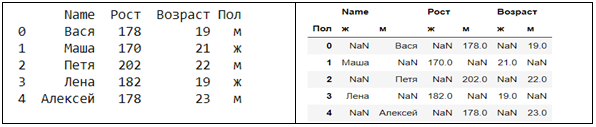
    Затем заполните значение NaN нулями.

In [149]:
multicol2 = pd.MultiIndex.from_tuples([('М', '0'),
                                       ('Ж', '1'),
                                       ('М', '2'),
                                       ('Ж', '3'),
                                       ('М', '4')])
df_multi_level_cols2 = pd.DataFrame([['Вася', 'Маша', 'Петя', 'Лена', 'Алексей'], 
                                     [178, 170, 202, 182, 178], 
                                     [19, 21, 22, 19, 23]],
                                    index=['name', 'height', 'age'],
                                    columns=multicol2)

df_multi_level_cols2.stack(0).T.fillna(0)

name          height      age    
      Ж        М      Ж    М   Ж   М
0     0     Вася      0  178   0  19
1  Маша        0    170    0  21   0
2     0     Петя      0  202   0  22
3  Лена        0    182    0  19   0
4     0  Алексей      0  178   0  23

In [150]:
multicol2 = pd.MultiIndex.from_tuples([('weight', 'kg'),
                                       ('height', 'm')])
df_multi_level_cols2 = pd.DataFrame([[1.0, 2.0], [3.0, 4.0]],
                                    index=['cat', 'dog'],
                                    columns=multicol2)
df_multi_level_cols2.stack(0).T

cat           dog       
   height weight height weight
kg    NaN    1.0    NaN    3.0
m     2.0    NaN    4.0    NaN

14.	Постройте с помощью Pandas график развития временного ряда: x(t) = x(t-1)*r + e(t), где D e = (1-r2)*Dx, если первое значение x генерируется случайно, а e(t) имеет нормальное распределение с нулевым средним. Коэффициент r должен находиться в пределах от -1 до 1.

<AxesSubplot:xlabel='0'>

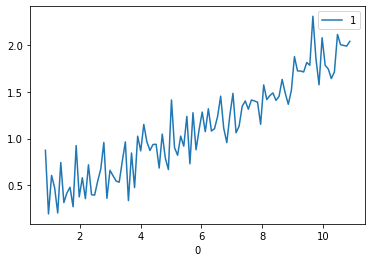

In [151]:
mu, sigma = 0, 0.2
size, length = 100, 10

'''я не понял саму функцию в задании, поэтому просто построил как линейную y = k * x + b
где первое значение генерировалось случайно, следующие равны предыдщему умноженному на статичный, 
случайно полученный коэффициент r и с добавленным e - которое соответствует нормальному распределению с
мю = 0 и стандартным отклонением 0.2 (также поигрался с ним, чем оно меньше, тем график больше похож на 
прямую)'''

x_start = np.random.random()
e = np.random.normal(mu, sigma, size-1)
r = np.random.random()

x_axis = pd.Series(np.linspace(x_start, x_start + length, size))
y_axis = pd.Series(x_axis[1:] * r + e)

df = pd.DataFrame([x_axis, y_axis]).T
df.iloc[0,1] = x_start
df.plot(x = 0, y = 1)